In [1]:
from predict import get_boundaries
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# inference on single wav
ckpt = "C:\\Users\\sriha\\OneDrive - International Institute of Information Technology\\Sem7\\SAL\\Project Proposal\\UnsupSeg\\pretrained_models\\timit+_pretrained.ckpt"
wav = "C:\\Users\\sriha\\OneDrive - International Institute of Information Technology\\Sem7\\SAL\\Project Proposal\\timit_directory\\test\\DR1_FAKS0_SA1.wav"

In [3]:
temp = get_boundaries(wav,ckpt,prominence=0.05)
print(len(temp))

running inference on: C:\Users\sriha\OneDrive - International Institute of Information Technology\Sem7\SAL\Project Proposal\timit_directory\test\DR1_FAKS0_SA1.wav
running inferece using ckpt: C:\Users\sriha\OneDrive - International Institute of Information Technology\Sem7\SAL\Project Proposal\UnsupSeg\pretrained_models\timit+_pretrained.ckpt


 ------------------------------------------------------------------------------------------
learning features from raw wav
prediction steps: [1]
overriding prominence with 0.05
predicted boundaries (in seconds):
[0.21 0.27 0.48 0.58 0.7  0.85 0.88 1.01 1.05 1.17 1.22 1.41 1.48 1.64
 1.71 1.78 1.81 1.89 2.02 2.06 2.19 2.34 2.4  2.47 2.64 2.68 2.83 2.97
 3.03 3.06 3.22 3.41 3.68 3.71 3.77 3.87]
36


c:\Users\sriha\miniconda3\envs\unsupseg\lib\site-packages\torch\nn\functional.py:1338: UserWarning: dropout2d: Received a 3D input to dropout2d and assuming that channel-wise 1D dropout behavior is desired - input is interpreted as shape (N, C, L), where C is the channel dim. This behavior will change in a future release to interpret the input as one without a batch dimension, i.e. shape (C, H, W). To maintain the 1D channel-wise dropout behavior, please switch to using dropout1d instead.
  warnings.warn("dropout2d: Received a 3D input to dropout2d and assuming that channel-wise "


In [4]:
# Step 1: Load the audio file at 16 kHz sample rate
def load_audio(file_path, target_sample_rate=16000):
    # librosa.load automatically resamples if needed
    audio_data, sr = librosa.load(file_path, sr=target_sample_rate)
    return audio_data, sr

# Step 2: Mark boundaries based on timestamps
def mark_boundaries(audio_data, timestamps, sample_rate):
    # Convert timestamps (in seconds) to sample indices
    boundary_indices = [int(t * sample_rate) for t in timestamps]
    return boundary_indices

# Step 3: Visualize the audio waveform with boundaries
def plot_audio_with_boundaries(audio_data, boundary_indices, sample_rate):
    # Create time axis for plotting (in seconds)
    time_axis = np.arange(len(audio_data)) / sample_rate

    # Plot the waveform
    plt.figure(figsize=(24, 6))
    plt.plot(time_axis, audio_data, label="Audio Signal", color='b')

    # Mark the boundaries
    for boundary in boundary_indices:
        plt.axvline(x=boundary / sample_rate, color='r', linestyle='--', label='Boundary')

    # Add labels and title
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Audio Signal with Boundaries')
    # plt.legend()
    plt.show()

# Example usage:
file_path = wav  # Replace with the path to your audio file
timestamps = temp  # Example timestamps in seconds

# Load audio
audio_data, sr = load_audio(file_path)

# Mark boundaries
boundary_indices = mark_boundaries(audio_data, timestamps, sr)

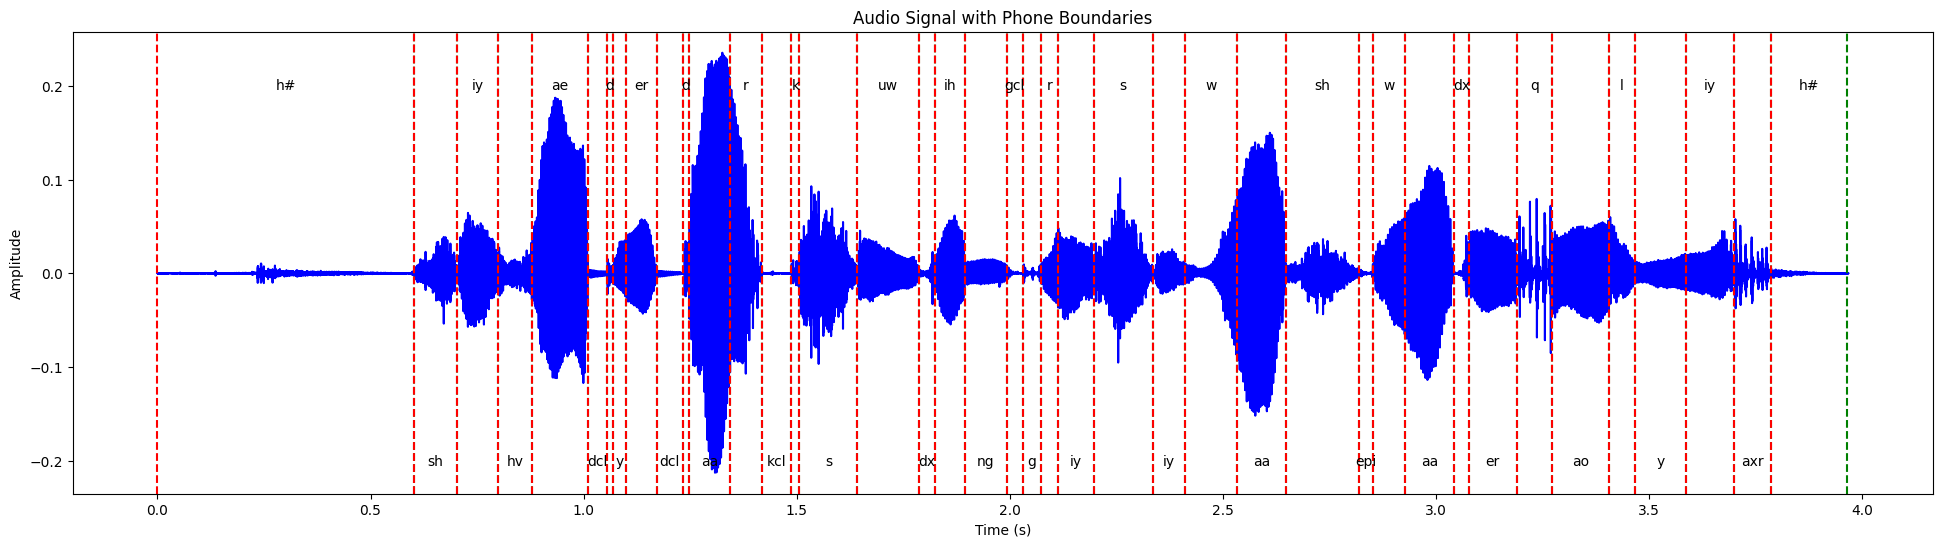

In [5]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the audio file at 16 kHz sample rate
def load_audio(file_path, target_sample_rate=16000):
    # librosa.load automatically resamples if needed
    audio_data, sr = librosa.load(file_path, sr=target_sample_rate)
    return audio_data, sr

# Step 2: Parse the text data from the file
def parse_phone_data(file_path):
    phone_boundaries = []
    with open(file_path, 'r') as f:
        for line in f:
            # Skip any empty lines or lines that are comments
            if line.strip() == '' or line.startswith('#'):
                continue
            # Split the line into start, end, and phone label
            start, end, label = line.split()
            start = int(start)
            end = int(end)
            phone_boundaries.append((start, end, label))
    return phone_boundaries

# Step 3: Plot the audio waveform with phone boundaries
def plot_audio_with_phone_boundaries(audio_data, phone_boundaries, sample_rate):
    # Create time axis for plotting (in seconds)
    time_axis = np.arange(len(audio_data)) / sample_rate

    # Plot the waveform
    plt.figure(figsize=(24, 6))
    plt.plot(time_axis, audio_data, label="Audio Signal", color='b')

    # Mark the boundaries and label them
    for i, (start, end, label) in enumerate(phone_boundaries):
        # Mark the start and end points of each phone label
        plt.axvline(x=start / sample_rate, color='r', linestyle='--', label=f"{label} start")
        plt.axvline(x=end / sample_rate, color='g', linestyle='--', label=f"{label} end")
        
        # Check if the index is even or odd to adjust label position
        if i % 2 == 0:
            # Place the label above for even indices
            plt.text((start + end) / (2 * sample_rate), 0.2, label, horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')
        else:
            # Place the label below for odd indices
            plt.text((start + end) / (2 * sample_rate), -0.2, label, horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')

    # Add labels and title
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Audio Signal with Phone Boundaries')
    # plt.legend(loc='upper right')
    plt.show()

# Example usage:
audio_file_path = wav # Replace with the path to your audio file
phone_file_path = wav[:-3]+"phn"  # Replace with the path to your phone boundary text file

# Load audio
audio_data, sr = load_audio(audio_file_path)

# Parse the phone boundaries from the text file
phone_boundaries = parse_phone_data(phone_file_path)
plot_audio_with_phone_boundaries(audio_data, phone_boundaries, sr)

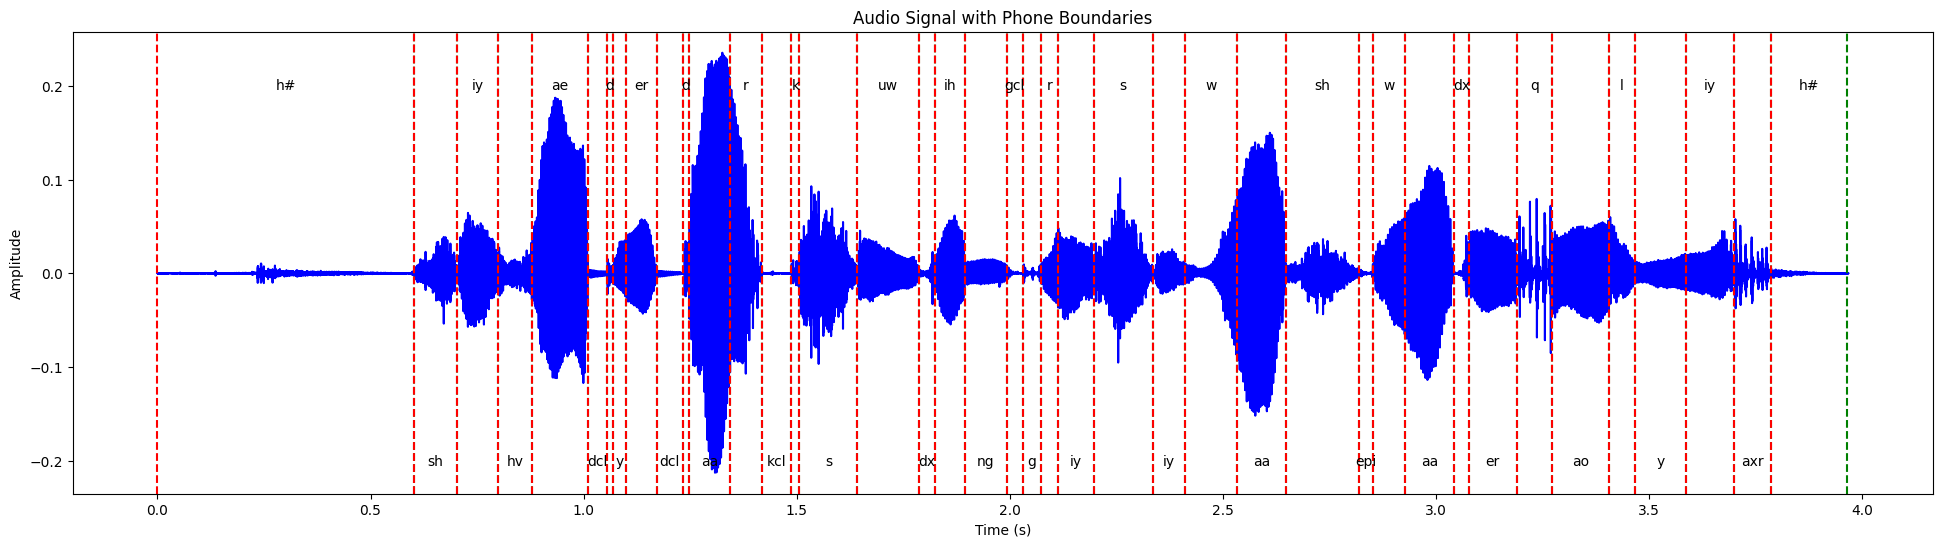

In [6]:
# Plot the result
plot_audio_with_phone_boundaries(audio_data, phone_boundaries, sr)

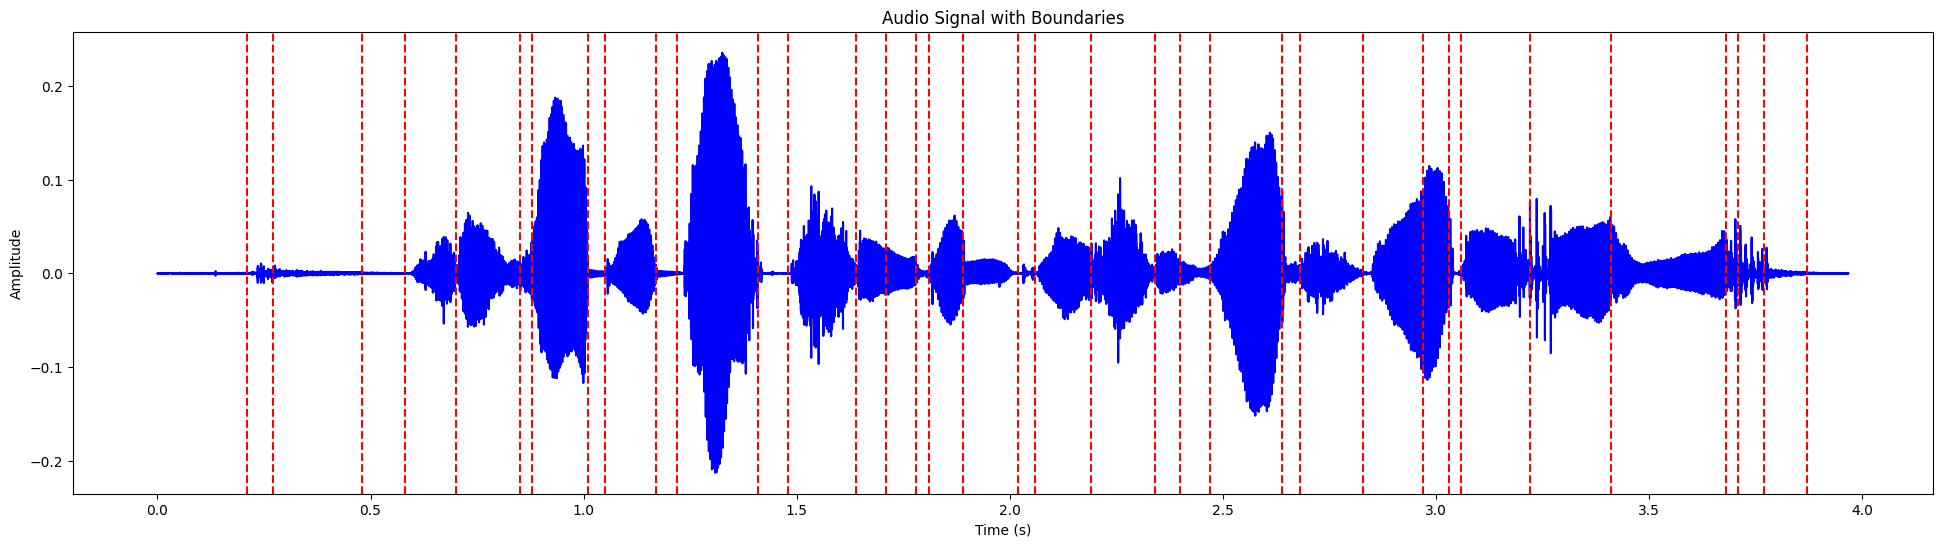

In [7]:
# Plot the result
plot_audio_with_boundaries(audio_data, boundary_indices, sr)

In [8]:
print(phone_boundaries[:5])
print(boundary_indices)

[(0, 9640, 'h#'), (9640, 11240, 'sh'), (11240, 12783, 'iy'), (12783, 14078, 'hv'), (14078, 16157, 'ae')]
[3360, 4320, 7680, 9280, 11200, 13600, 14080, 16160, 16800, 18720, 19520, 22560, 23680, 26240, 27360, 28480, 28960, 30240, 32320, 32960, 35040, 37440, 38400, 39520, 42240, 42880, 45280, 47520, 48480, 48960, 51520, 54560, 58880, 59360, 60320, 61920]


In [9]:
gt_boundaries=[]
for (i,boundary) in enumerate(phone_boundaries[1:]):
    gt_boundaries.append((boundary[0],phone_boundaries[i-1][-1],boundary[2]))
threshold = (20/1000)*sr # 20 ms
matched = []
unmatched_gt = []
unmatched_pred = list(boundary_indices)
for gt_b in gt_boundaries:
    closest_pred = min(unmatched_pred, key=lambda p: abs(p - gt_b[0]), default=None)
    if closest_pred is not None and abs(closest_pred - gt_b[0]) <= threshold:
        matched.append((gt_b, closest_pred))
        unmatched_pred.remove(closest_pred)
    else:
        unmatched_gt.append(gt_b)

In [10]:
unmatched_gt

[(9640, 'h#', 'sh'),
 (12783, 'sh', 'hv'),
 (17103, 'dcl', 'y'),
 (17587, 'd', 'er'),
 (19962, 'dcl', 'aa'),
 (21514, 'd', 'r'),
 (24104, 'kcl', 's'),
 (31880, 'ih', 'gcl'),
 (33829, 'g', 'iy'),
 (40546, 'iy', 'aa'),
 (45624, 'sh', 'w'),
 (46855, 'epi', 'aa'),
 (51033, 'dx', 'q'),
 (52378, 'er', 'ao'),
 (55461, 'ao', 'y'),
 (57395, 'l', 'iy')]

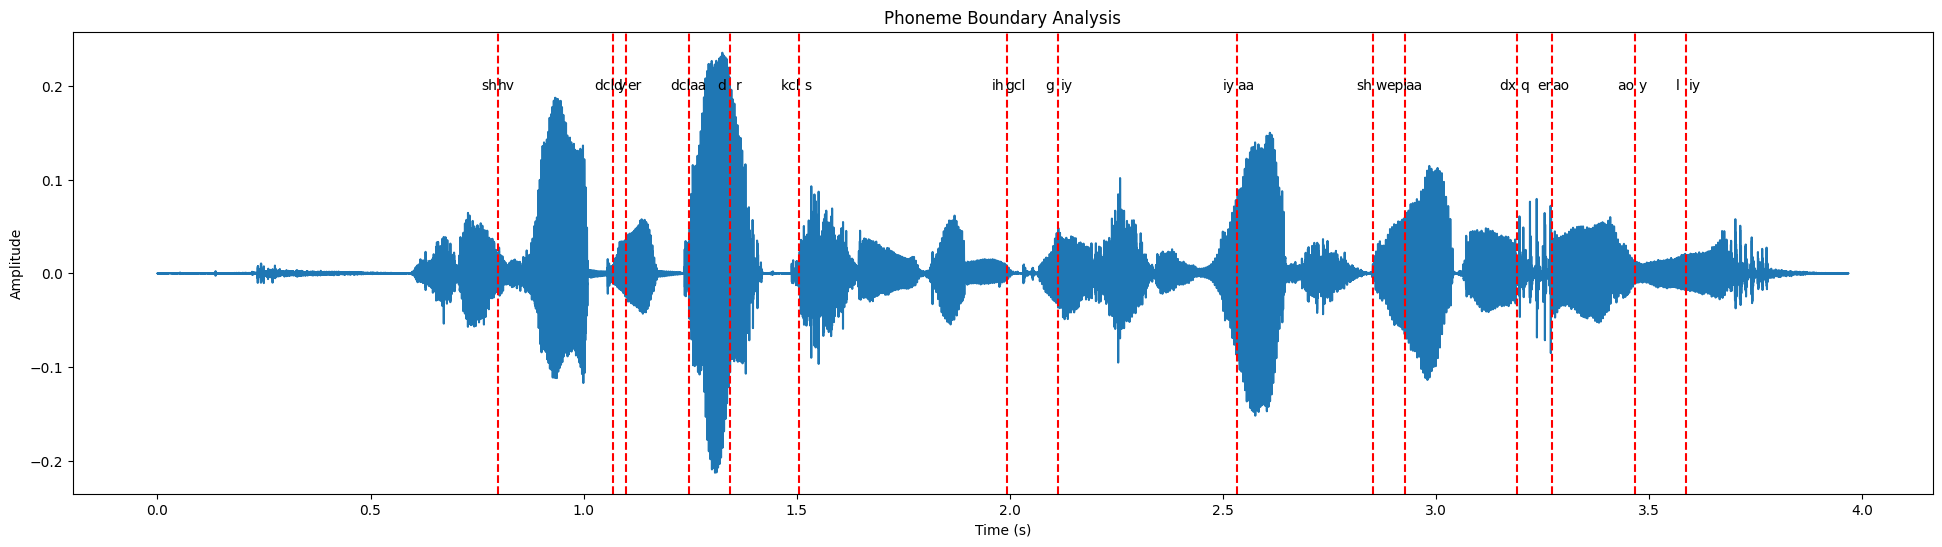

In [12]:
# Plot waveform
time = np.linspace(0, len(audio_data) / sr, len(audio_data))
plt.figure(figsize=(24, 6))
plt.plot(time, audio_data, label="Waveform")

# Plot boundaries
# for gt, pred in matched:
#     plt.axvline(gt, color='green', linestyle='--', label='Matched' if gt == matched[0][0] else "")
for gt in unmatched_gt[1:]:
    x = gt[0]/sr
    plt.axvline(x, color='red', linestyle='--', label='Unmatched GT')
    plt.text(x-0.02, 0.2, gt[1], horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')
    plt.text(x+0.02, 0.2, gt[2], horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')
# for pred in unmatched_pred:
#     plt.axvline(pred/sr, color='blue', linestyle='--', label='Unmatched Prediction' if pred == unmatched_pred[0] else "")

# plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Phoneme Boundary Analysis")
plt.show()

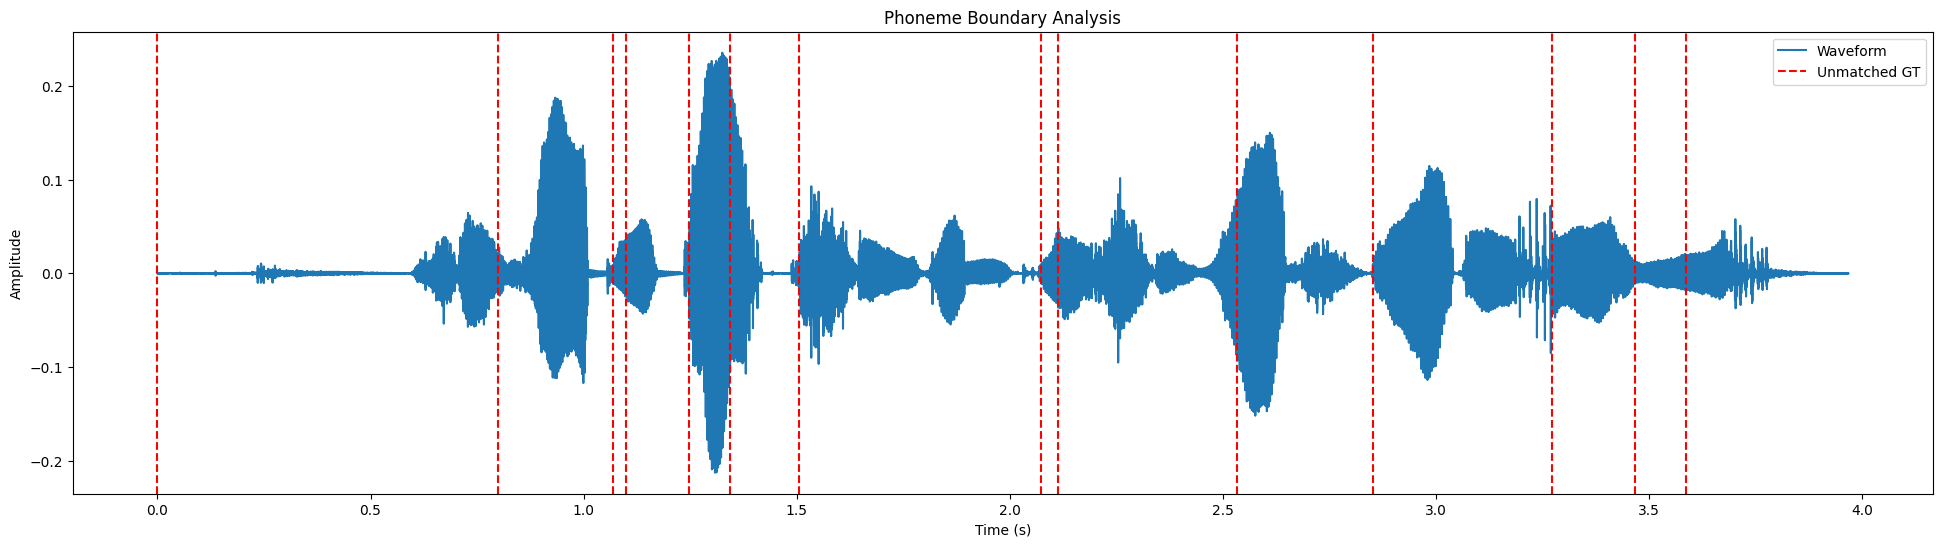

In [9]:
# Convert ground truth samples to time
ground_truth = phone_boundaries
gt_boundaries = np.array([start / sr for start, _, _ in ground_truth])

# Model predictions
predicted_boundaries = timestamps

# Matching boundaries
threshold = 0.05  # 20 ms
matched = []
unmatched_gt = []
unmatched_pred = list(predicted_boundaries)

for (i,gt) in enumerate(gt_boundaries):
    closest_pred = min(unmatched_pred, key=lambda p: abs(p - gt), default=None)
    if closest_pred is not None and abs(closest_pred - gt) <= threshold:
        matched.append((gt, closest_pred))
        unmatched_pred.remove(closest_pred)
    else:
        unmatched_gt.append(gt)

# Plot waveform
time = np.linspace(0, len(audio_data) / sr, len(audio_data))
plt.figure(figsize=(24, 6))
plt.plot(time, audio_data, label="Waveform")

# Plot boundaries
# for gt, pred in matched:
#     plt.axvline(gt, color='green', linestyle='--', label='Matched' if gt == matched[0][0] else "")
for gt in unmatched_gt:
    plt.axvline(gt, color='red', linestyle='--', label='Unmatched GT' if gt == unmatched_gt[0] else "")
# for pred in unmatched_pred:
#     plt.axvline(pred, color='blue', linestyle='--', label='Unmatched Prediction' if pred == unmatched_pred[0] else "")

plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Phoneme Boundary Analysis")
plt.show()

In [10]:
# Step 1: Define a function to find phoneme context for unmatched ground truth
def find_phoneme_context(boundary, ground_truth):
    # for start, end, phoneme in ground_truth:
    #     if start / sr < boundary < end / sr:
    #         return phoneme, None  # Inside a phoneme bucket
    #     elif end / sr < boundary < (ground_truth[ground_truth.index((start, end, phoneme)) + 1][0] / sr):
    #         prev_phoneme = phoneme
    #         next_phoneme = ground_truth[ground_truth.index((start, end, phoneme)) + 1][2]
    #         return prev_phoneme, next_phoneme
    return None, None
    # idx = ground_truth.index((start, end, phoneme))
    # prev_phoneme = None
    # if(idx==0)
    #     prev_phoneme = ground_truth[]

# Step 2: Find phoneme bucket for unmatched predicted boundaries
def find_phoneme_bucket(boundary, ground_truth):
    for start, end, phoneme in ground_truth:
        if start / sr <= boundary <= end / sr:
            return phoneme
    return None

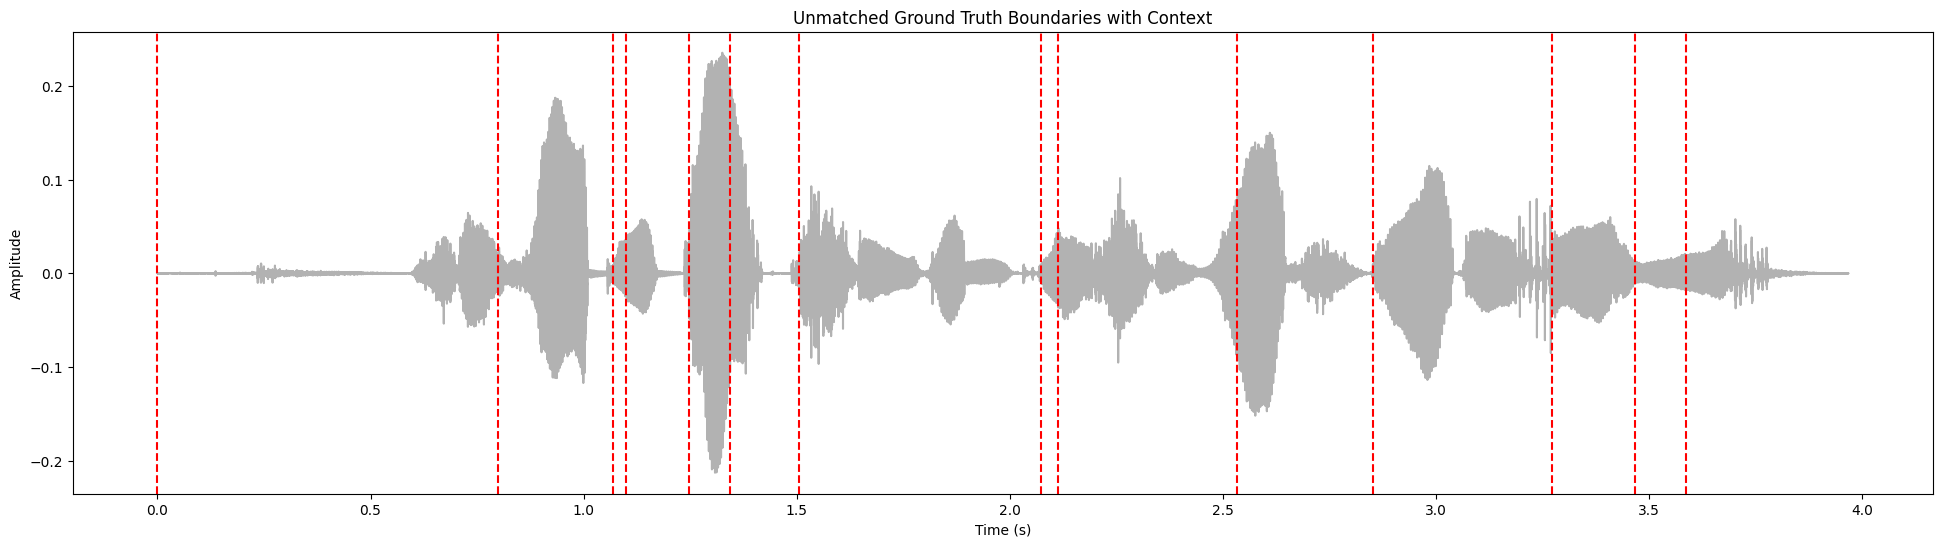

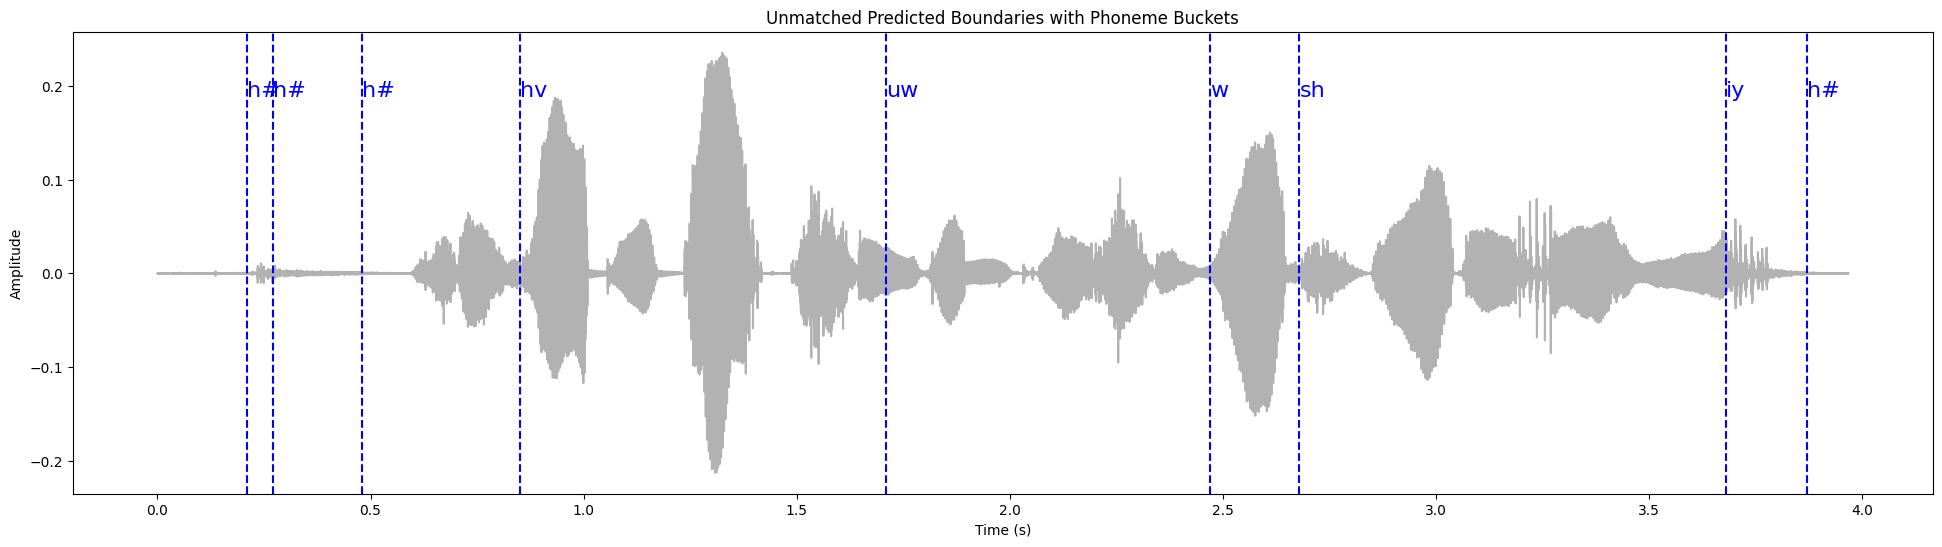

In [ ]:
# Step 1: Plot unmatched_gt with phoneme context
plt.figure(figsize=(24, 6))

# Plot the waveform
time = np.linspace(0, len(audio_data) / sr, len(audio_data))
plt.plot(time, audio_data, label="Waveform", color="gray", alpha=0.6)

# Plot unmatched_gt boundaries with context
for gt in unmatched_gt:
    prev_phoneme, next_phoneme = find_phoneme_context(gt, ground_truth)
    plt.axvline(gt, color='red', linestyle='--')
    if prev_phoneme and next_phoneme:
        plt.text(gt, max(audio_data) * 0.8, f"{prev_phoneme}-{next_phoneme}", color='red', rotation=0, fontsize=16)

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Unmatched Ground Truth Boundaries with Context")
plt.show()

# Step 2: Plot unmatched_pred with phoneme buckets
plt.figure(figsize=(24, 6))

# Plot the waveform
plt.plot(time, audio_data, label="Waveform", color="gray", alpha=0.6)

# Plot unmatched_pred boundaries with phoneme bucket
for pred in unmatched_pred:
    phoneme = find_phoneme_bucket(pred, ground_truth)
    plt.axvline(pred, color='blue', linestyle='--')
    if phoneme:
        plt.text(pred, max(audio_data) * 0.8, phoneme, color='blue', rotation=0, fontsize=16)

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Unmatched Predicted Boundaries with Phoneme Buckets")
plt.show()